In [1]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer # for stemming
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split , cross_val_score,KFold
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import warnings
!pip install imblearn
import imblearn
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [3]:
gensim.__version__

#o/p:-4.2.0

'4.3.3'

In [4]:
np.random.seed(42)

In [5]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [6]:
!pip install nltk
!pip install gensim

In [7]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [8]:
wv = api.load('fasttext-wiki-news-subwords-300')
type(wv)

[==================================================] 100.0% 958.5/958.4MB downloaded


gensim.models.keyedvectors.KeyedVectors

In [9]:
# Reading Training Data
nRowsRead = None
X_train_file = pd.read_csv('Train-Augmentation.csv', delimiter=',', nrows=nRowsRead, encoding="ISO-8859-1")
nRow, nCol = X_train_file.shape
print(f'Training Data: {nRow} rows, {nCol} columns')

# Reading Test Data
X_test_file = pd.read_csv('Test.csv', delimiter=',', nrows=nRowsRead, encoding="ISO-8859-1")
nRow, nCol = X_test_file.shape
print(f'Test Data: {nRow} rows, {nCol} columns')

# Reading Validation Data
X_validation_file = pd.read_csv('Validation.csv', delimiter=',', nrows=nRowsRead, encoding="ISO-8859-1")
nRow, nCol = X_validation_file.shape
print(f'Validation Data: {nRow} rows, {nCol} columns')


Training Data: 8577 rows, 2 columns
Test Data: 4957 rows, 2 columns
Validation Data: 2974 rows, 2 columns


In [10]:
# Tokenizer and Vectorization
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    return wv_res / ctr

In [11]:
def spacy_tokenizer(sentence):
    doc = nlp(sentence)
    mytokens = [
        word.lemma_.lower().strip()
        for word in doc
        if word.text.lower() not in stop_words and word.text not in punctuations
    ]
    return mytokens




In [12]:
# Preprocessing Data
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
punctuations = string.punctuation

X_train_file['tokens'] = X_train_file['tweet'].apply(spacy_tokenizer)
X_test_file['tokens'] = X_test_file['tweet'].apply(spacy_tokenizer)
X_validation_file['tokens'] = X_validation_file['tweet'].apply(spacy_tokenizer)


In [13]:
X_train_file['vec'] = X_train_file['tokens'].apply(sent_vec)
X_test_file['vec'] = X_test_file['tokens'].apply(sent_vec)
X_validation_file['vec'] = X_validation_file['tokens'].apply(sent_vec)

In [14]:
A = X_train_file['vec'].to_list()
B = X_train_file['label']
C = X_test_file['vec'].to_list()
D = X_test_file['label']
E = X_validation_file['vec'].to_list()
F = X_validation_file['label']

Class=1, n=2859 (33.333%)
Class=2, n=2859 (33.333%)
Class=0, n=2859 (33.333%)


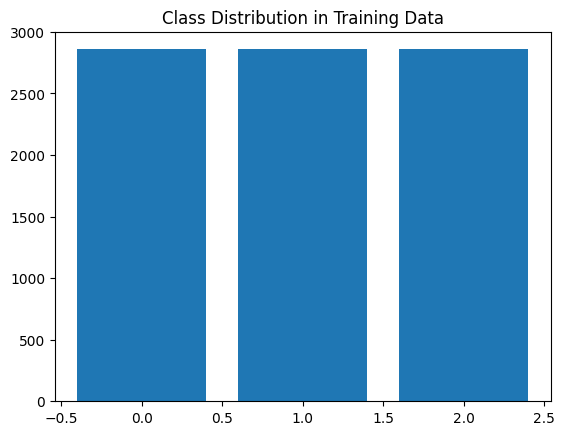

Class=1, n=2287 (76.900%)
Class=2, n=509 (17.115%)
Class=0, n=178 (5.985%)


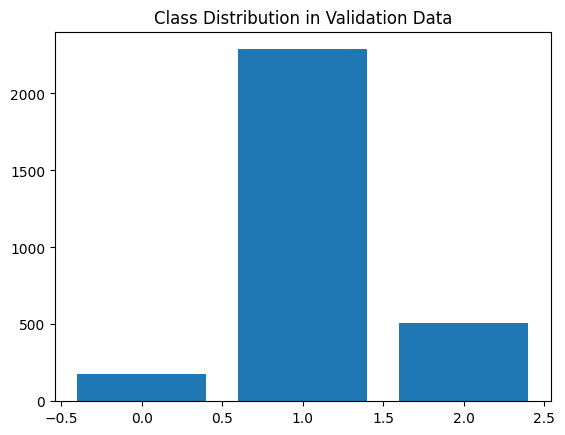

In [15]:
# Class Distribution in Training Data
counter = Counter(B)
for k, v in counter.items():
    print(f'Class={k}, n={v} ({v / len(B) * 100:.3f}%)')

plt.bar(counter.keys(), counter.values())
plt.title('Class Distribution in Training Data')
plt.show()

# Class Distribution in Validation Data
counter = Counter(F)
for k, v in counter.items():
    print(f'Class={k}, n={v} ({v / len(F) * 100:.3f}%)')

plt.bar(counter.keys(), counter.values())
plt.title('Class Distribution in Validation Data')
plt.show()


In [16]:
X_train = np.array(X_train_file['vec'].tolist())
y_train = np.array(X_train_file['label'].tolist())

X_test = np.array(X_test_file['vec'].tolist())
y_test = np.array(X_test_file['label'].tolist())

X_validation = np.array(X_validation_file['vec'].tolist())
y_validation = np.array(X_validation_file['label'].tolist())


In [17]:
alg =[
       LogisticRegression(random_state=42),
       GaussianNB(),
       DecisionTreeClassifier(random_state=42),
       MLPClassifier(hidden_layer_sizes=(50,40), max_iter=300),
       SGDClassifier(),
       SVC(random_state=42),
       RandomForestClassifier(n_estimators=300,random_state=42),
       AdaBoostClassifier(n_estimators=300, random_state=42),
       XGBClassifier(n_estimators=300, random_state=42),
       LGBMClassifier(n_estimators=300, random_state=42),
       CatBoostClassifier(n_estimators=300, random_state=42)
       ]

name = [
        "LogisticRegression",
        "GaussianNB",
        "DecisionTree",
        "MLPClassifier",
        "SGD",
        "SVM",
        "RandomForest" ,
        "AdaBoost",
        "XGB",
        "LGBM",
        "CatBoost"
        ]

----------------- LogisticRegression ----------------------
===== Validation LogisticRegression =====
Precision: 0.63143081
Recall: 0.75662782
Accuracy: 0.79892401
F1 Score: 0.66156041


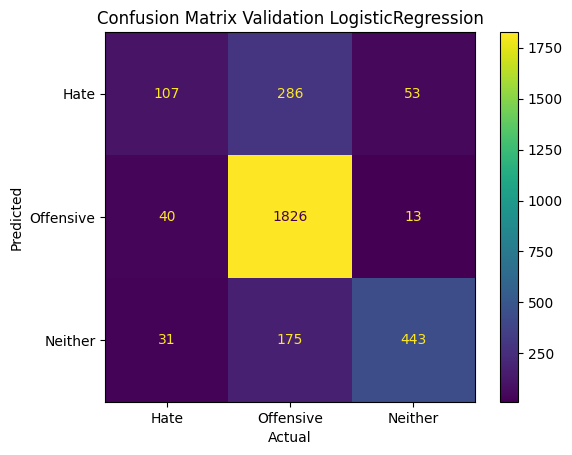

              precision    recall  f1-score   support

        Hate     0.2399    0.6011    0.3429       178
   Offensive     0.9718    0.7984    0.8766      2287
     Neither     0.6826    0.8703    0.7651       509

    accuracy                         0.7989      2974
   macro avg     0.6314    0.7566    0.6616      2974
weighted avg     0.8785    0.7989    0.8256      2974

===== Test LogisticRegression =====
Precision: 0.61517814
Recall: 0.74105470
Accuracy: 0.80310672
F1 Score: 0.64151428


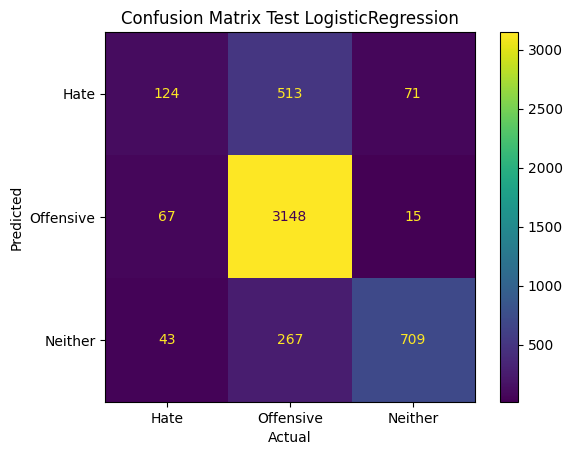

              precision    recall  f1-score   support

        Hate     0.1751    0.5299    0.2633       234
   Offensive     0.9746    0.8014    0.8796      3928
     Neither     0.6958    0.8918    0.7817       795

    accuracy                         0.8031      4957
   macro avg     0.6152    0.7411    0.6415      4957
weighted avg     0.8922    0.8031    0.8348      4957

----------------- GaussianNB ----------------------
===== Validation GaussianNB =====
Precision: 0.55048312
Recall: 0.63182058
Accuracy: 0.74915938
F1 Score: 0.56988774


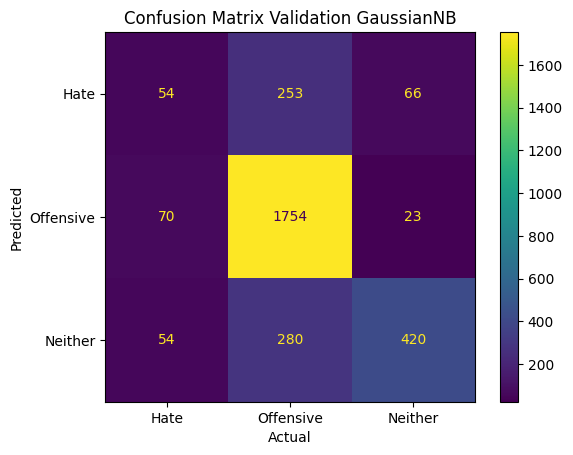

              precision    recall  f1-score   support

        Hate     0.1448    0.3034    0.1960       178
   Offensive     0.9496    0.7669    0.8486      2287
     Neither     0.5570    0.8251    0.6651       509

    accuracy                         0.7492      2974
   macro avg     0.5505    0.6318    0.5699      2974
weighted avg     0.8343    0.7492    0.7781      2974

===== Test GaussianNB =====
Precision: 0.53897417
Recall: 0.63227146
Accuracy: 0.76901352
F1 Score: 0.56224750


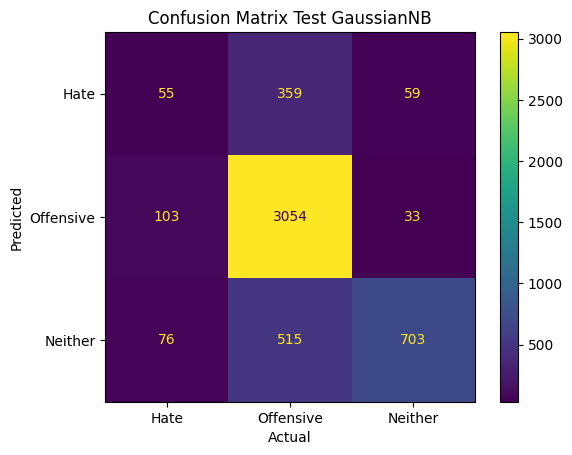

              precision    recall  f1-score   support

        Hate     0.1163    0.2350    0.1556       234
   Offensive     0.9574    0.7775    0.8581      3928
     Neither     0.5433    0.8843    0.6730       795

    accuracy                         0.7690      4957
   macro avg     0.5390    0.6323    0.5622      4957
weighted avg     0.8513    0.7690    0.7953      4957

----------------- DecisionTree ----------------------
===== Validation DecisionTree =====
Precision: 0.50171875
Recall: 0.58335012
Accuracy: 0.60692670
F1 Score: 0.48696151


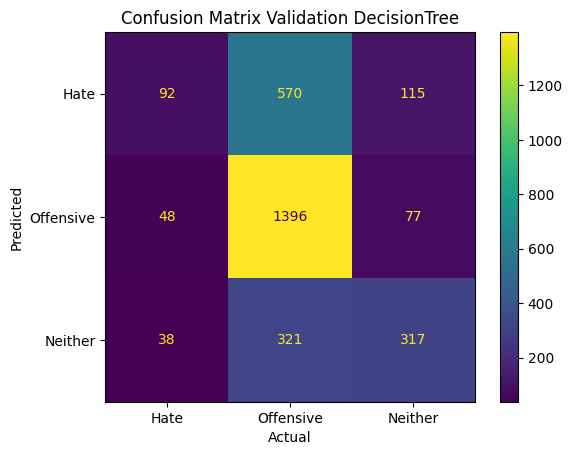

              precision    recall  f1-score   support

        Hate     0.1184    0.5169    0.1927       178
   Offensive     0.9178    0.6104    0.7332      2287
     Neither     0.4689    0.6228    0.5350       509

    accuracy                         0.6069      2974
   macro avg     0.5017    0.5834    0.4870      2974
weighted avg     0.7931    0.6069    0.6669      2974

===== Test DecisionTree =====
Precision: 0.49088357
Recall: 0.56641164
Accuracy: 0.59471455
F1 Score: 0.46689739


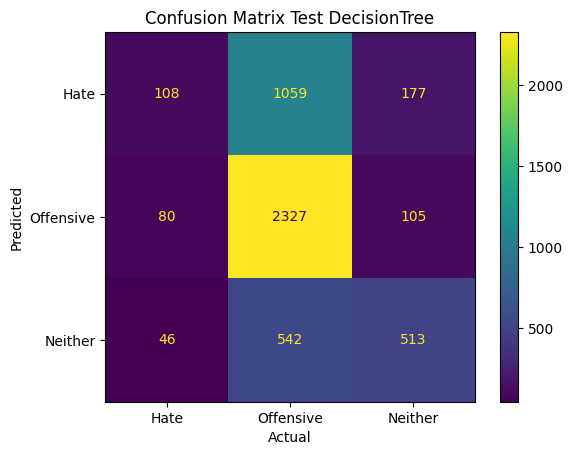

              precision    recall  f1-score   support

        Hate     0.0804    0.4615    0.1369       234
   Offensive     0.9264    0.5924    0.7227      3928
     Neither     0.4659    0.6453    0.5411       795

    accuracy                         0.5947      4957
   macro avg     0.4909    0.5664    0.4669      4957
weighted avg     0.8126    0.5947    0.6659      4957

----------------- MLPClassifier ----------------------
===== Validation MLPClassifier =====
Precision: 0.60676808
Recall: 0.71009433
Accuracy: 0.74882313
F1 Score: 0.61784123


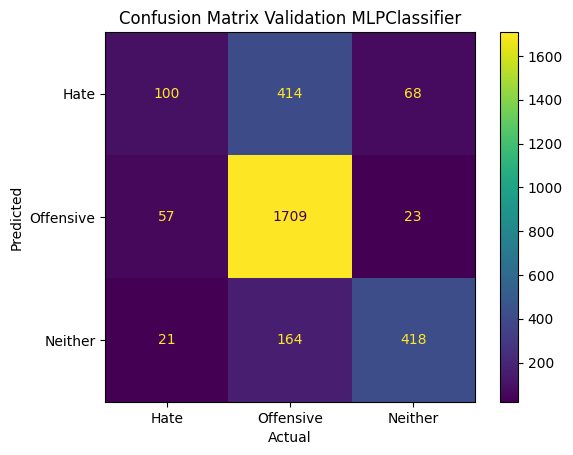

              precision    recall  f1-score   support

        Hate     0.1718    0.5618    0.2632       178
   Offensive     0.9553    0.7473    0.8386      2287
     Neither     0.6932    0.8212    0.7518       509

    accuracy                         0.7488      2974
   macro avg     0.6068    0.7101    0.6178      2974
weighted avg     0.8635    0.7488    0.7893      2974

===== Test MLPClassifier =====
Precision: 0.59480410
Recall: 0.70499478
Accuracy: 0.75711116
F1 Score: 0.60340764


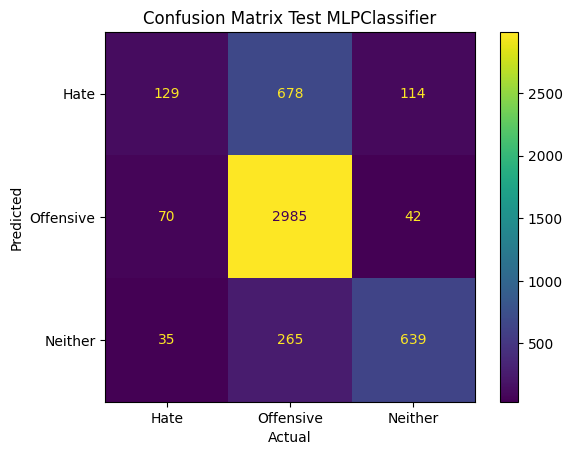

              precision    recall  f1-score   support

        Hate     0.1401    0.5513    0.2234       234
   Offensive     0.9638    0.7599    0.8498      3928
     Neither     0.6805    0.8038    0.7370       795

    accuracy                         0.7571      4957
   macro avg     0.5948    0.7050    0.6034      4957
weighted avg     0.8795    0.7571    0.8022      4957

----------------- SGD ----------------------
===== Validation SGD =====
Precision: 0.65443992
Recall: 0.77679682
Accuracy: 0.82716880
F1 Score: 0.69154347


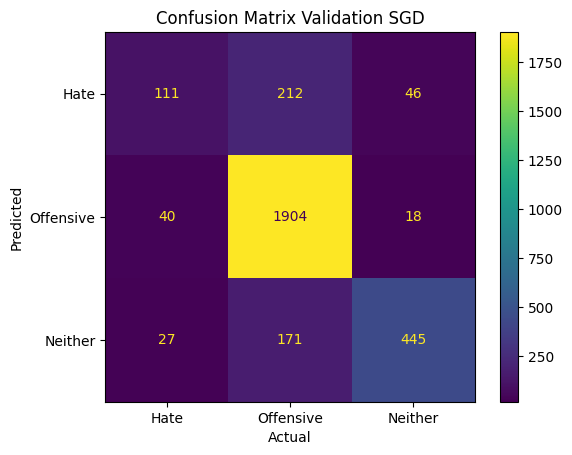

              precision    recall  f1-score   support

        Hate     0.3008    0.6236    0.4059       178
   Offensive     0.9704    0.8325    0.8962      2287
     Neither     0.6921    0.8743    0.7726       509

    accuracy                         0.8272      2974
   macro avg     0.6544    0.7768    0.6915      2974
weighted avg     0.8827    0.8272    0.8457      2974

===== Test SGD =====
Precision: 0.62977569
Recall: 0.75360521
Accuracy: 0.83215655
F1 Score: 0.66537983


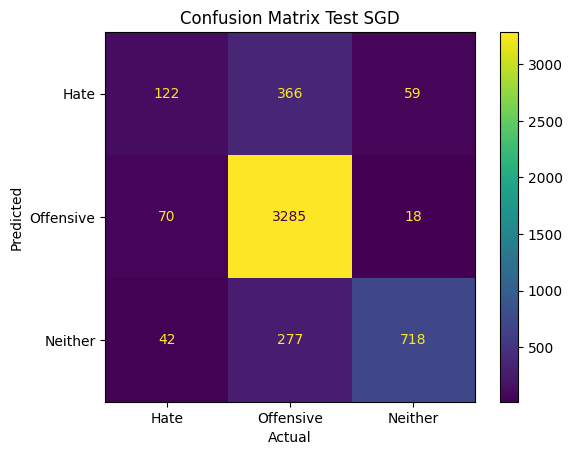

              precision    recall  f1-score   support

        Hate     0.2230    0.5214    0.3124       234
   Offensive     0.9739    0.8363    0.8999      3928
     Neither     0.6924    0.9031    0.7838       795

    accuracy                         0.8322      4957
   macro avg     0.6298    0.7536    0.6654      4957
weighted avg     0.8933    0.8322    0.8535      4957

----------------- SVM ----------------------
===== Validation SVM =====
Precision: 0.64873569
Recall: 0.78487200
Accuracy: 0.81203766
F1 Score: 0.68314893


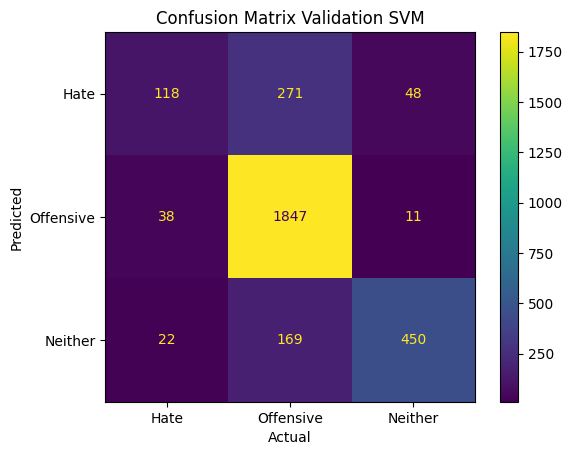

              precision    recall  f1-score   support

        Hate     0.2700    0.6629    0.3837       178
   Offensive     0.9742    0.8076    0.8831      2287
     Neither     0.7020    0.8841    0.7826       509

    accuracy                         0.8120      2974
   macro avg     0.6487    0.7849    0.6831      2974
weighted avg     0.8854    0.8120    0.8360      2974

===== Test SVM =====
Precision: 0.63236464
Recall: 0.76442146
Accuracy: 0.81964898
F1 Score: 0.66260985


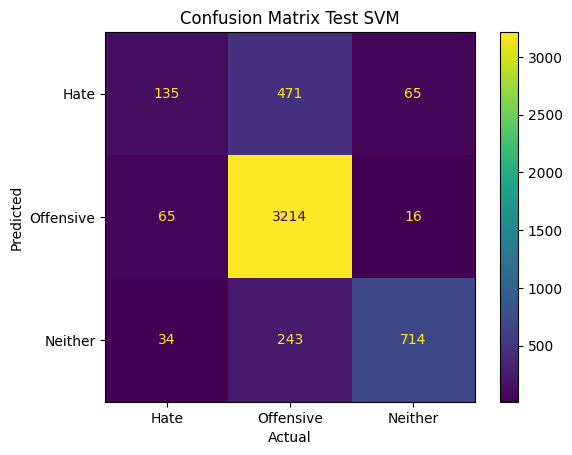

              precision    recall  f1-score   support

        Hate     0.2012    0.5769    0.2983       234
   Offensive     0.9754    0.8182    0.8899      3928
     Neither     0.7205    0.8981    0.7996       795

    accuracy                         0.8196      4957
   macro avg     0.6324    0.7644    0.6626      4957
weighted avg     0.8980    0.8196    0.8475      4957

----------------- RandomForest ----------------------
===== Validation RandomForest =====
Precision: 0.61233866
Recall: 0.74091881
Accuracy: 0.77841291
F1 Score: 0.64064423


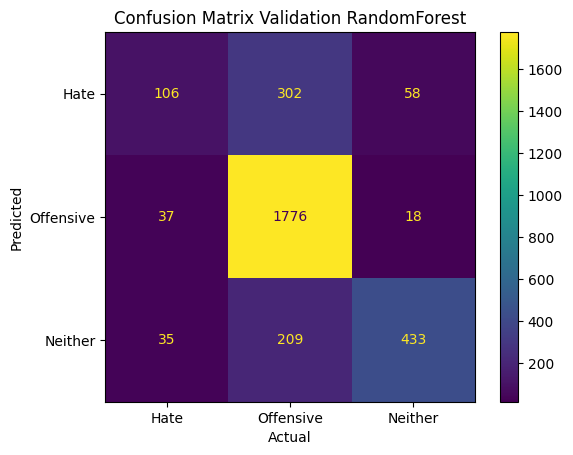

              precision    recall  f1-score   support

        Hate     0.2275    0.5955    0.3292       178
   Offensive     0.9700    0.7766    0.8626      2287
     Neither     0.6396    0.8507    0.7302       509

    accuracy                         0.7784      2974
   macro avg     0.6123    0.7409    0.6406      2974
weighted avg     0.8690    0.7784    0.8080      2974

===== Test RandomForest =====
Precision: 0.59177655
Recall: 0.71953172
Accuracy: 0.78696792
F1 Score: 0.61967983


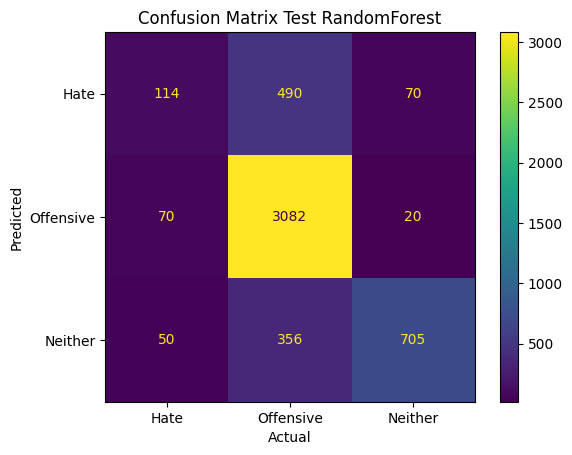

              precision    recall  f1-score   support

        Hate     0.1691    0.4872    0.2511       234
   Offensive     0.9716    0.7846    0.8682      3928
     Neither     0.6346    0.8868    0.7398       795

    accuracy                         0.7870      4957
   macro avg     0.5918    0.7195    0.6197      4957
weighted avg     0.8797    0.7870    0.8184      4957

----------------- AdaBoost ----------------------
===== Validation AdaBoost =====
Precision: 0.61074430
Recall: 0.70795777
Accuracy: 0.76059180
F1 Score: 0.62158440


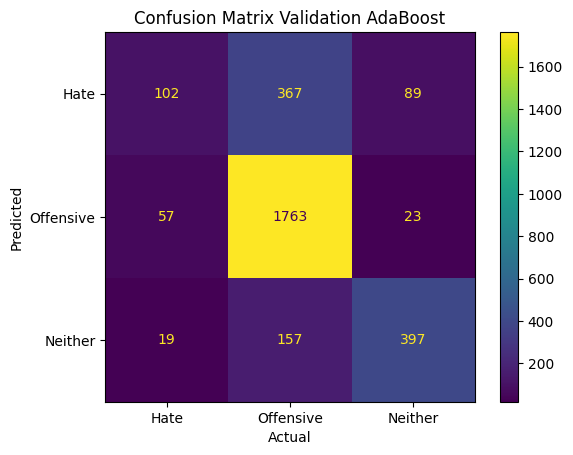

              precision    recall  f1-score   support

        Hate     0.1828    0.5730    0.2772       178
   Offensive     0.9566    0.7709    0.8538      2287
     Neither     0.6928    0.7800    0.7338       509

    accuracy                         0.7606      2974
   macro avg     0.6107    0.7080    0.6216      2974
weighted avg     0.8651    0.7606    0.7987      2974

===== Test AdaBoost =====
Precision: 0.59678775
Recall: 0.68467835
Accuracy: 0.76457535
F1 Score: 0.60354727


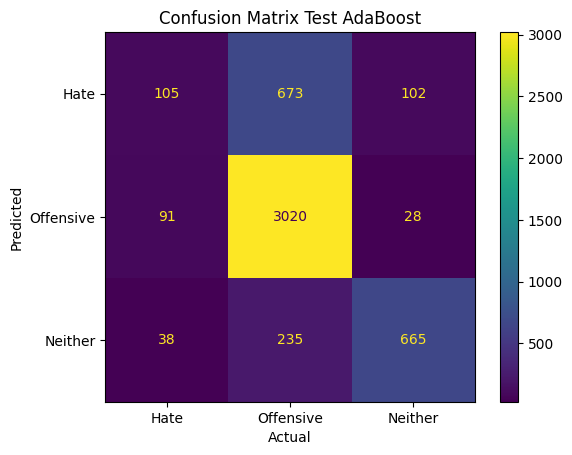

              precision    recall  f1-score   support

        Hate     0.1193    0.4487    0.1885       234
   Offensive     0.9621    0.7688    0.8547      3928
     Neither     0.7090    0.8365    0.7675       795

    accuracy                         0.7646      4957
   macro avg     0.5968    0.6847    0.6035      4957
weighted avg     0.8817    0.7646    0.8092      4957

----------------- XGB ----------------------
===== Validation XGB =====
Precision: 0.63460868
Recall: 0.75788581
Accuracy: 0.80228648
F1 Score: 0.66493943


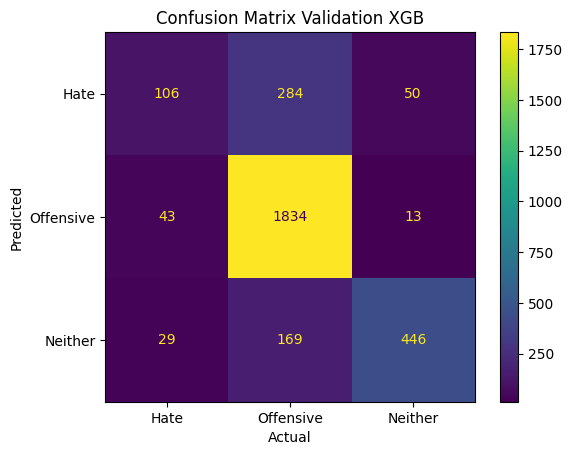

              precision    recall  f1-score   support

        Hate     0.2409    0.5955    0.3430       178
   Offensive     0.9704    0.8019    0.8781      2287
     Neither     0.6925    0.8762    0.7736       509

    accuracy                         0.8023      2974
   macro avg     0.6346    0.7579    0.6649      2974
weighted avg     0.8792    0.8023    0.8282      2974

===== Test XGB =====
Precision: 0.62542405
Recall: 0.75602411
Accuracy: 0.81561428
F1 Score: 0.65560394


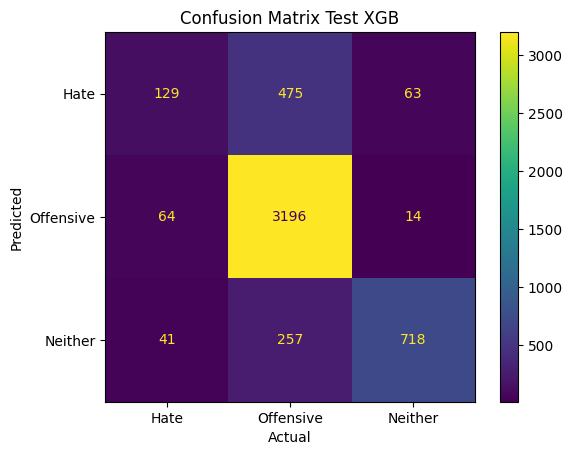

              precision    recall  f1-score   support

        Hate     0.1934    0.5513    0.2863       234
   Offensive     0.9762    0.8136    0.8875      3928
     Neither     0.7067    0.9031    0.7929       795

    accuracy                         0.8156      4957
   macro avg     0.6254    0.7560    0.6556      4957
weighted avg     0.8960    0.8156    0.8440      4957

----------------- LGBM ----------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 8577, number of used features: 300
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
===== Validation LGBM =====
Precision: 0.64015003
Recall: 0.77302893
Accuracy: 0.80228648
F1 Score: 0.67232879


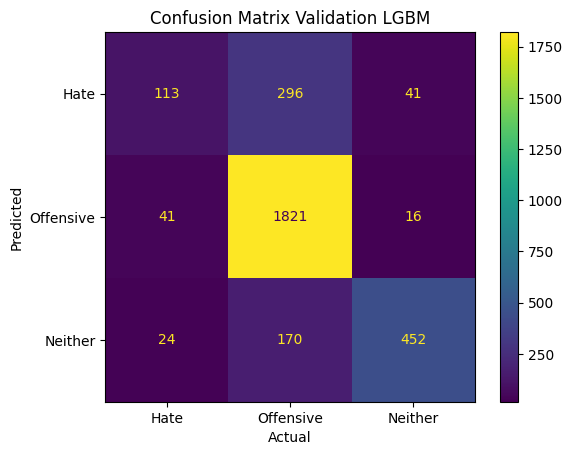

              precision    recall  f1-score   support

        Hate     0.2511    0.6348    0.3599       178
   Offensive     0.9696    0.7962    0.8744      2287
     Neither     0.6997    0.8880    0.7827       509

    accuracy                         0.8023      2974
   macro avg     0.6402    0.7730    0.6723      2974
weighted avg     0.8804    0.8023    0.8279      2974

===== Test LGBM =====
Precision: 0.62132718
Recall: 0.75062620
Accuracy: 0.80835183
F1 Score: 0.64917001


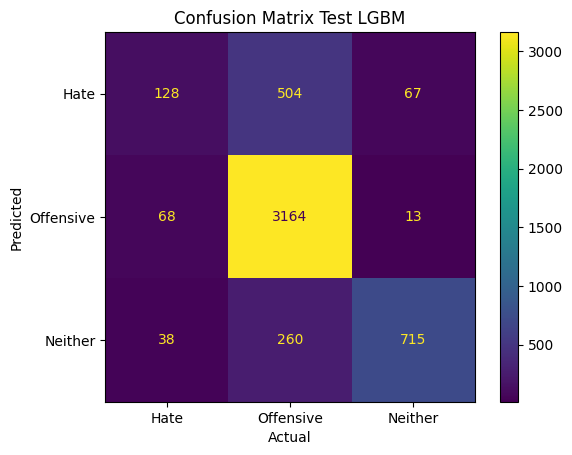

              precision    recall  f1-score   support

        Hate     0.1831    0.5470    0.2744       234
   Offensive     0.9750    0.8055    0.8822      3928
     Neither     0.7058    0.8994    0.7909       795

    accuracy                         0.8084      4957
   macro avg     0.6213    0.7506    0.6492      4957
weighted avg     0.8945    0.8084    0.8389      4957

----------------- CatBoost ----------------------
Learning rate set to 0.244206
0:	learn: 1.0157303	total: 548ms	remaining: 2m 43s
1:	learn: 0.9499399	total: 784ms	remaining: 1m 56s
2:	learn: 0.9055956	total: 1.01s	remaining: 1m 40s
3:	learn: 0.8657639	total: 1.23s	remaining: 1m 30s
4:	learn: 0.8372704	total: 1.45s	remaining: 1m 25s
5:	learn: 0.8095298	total: 1.68s	remaining: 1m 22s
6:	learn: 0.7870953	total: 1.9s	remaining: 1m 19s
7:	learn: 0.7660145	total: 2.12s	remaining: 1m 17s
8:	learn: 0.7484369	total: 2.34s	remaining: 1m 15s
9:	learn: 0.7341041	total: 2.56s	remaining: 1m 14s
10:	learn: 0.7178435	total: 2.

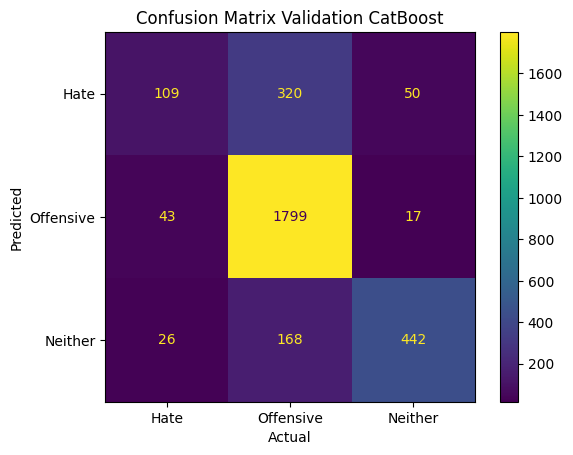

              precision    recall  f1-score   support

        Hate     0.2276    0.6124    0.3318       178
   Offensive     0.9677    0.7866    0.8678      2287
     Neither     0.6950    0.8684    0.7721       509

    accuracy                         0.7902      2974
   macro avg     0.6301    0.7558    0.6572      2974
weighted avg     0.8767    0.7902    0.8194      2974

===== Test CatBoost =====
Precision: 0.61882356
Recall: 0.74239627
Accuracy: 0.80310672
F1 Score: 0.64331395


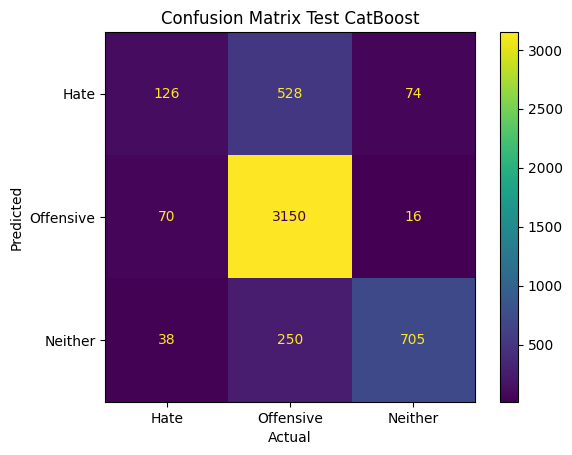

              precision    recall  f1-score   support

        Hate     0.1731    0.5385    0.2620       234
   Offensive     0.9734    0.8019    0.8794      3928
     Neither     0.7100    0.8868    0.7886       795

    accuracy                         0.8031      4957
   macro avg     0.6188    0.7424    0.6433      4957
weighted avg     0.8934    0.8031    0.8357      4957

                 Model  Precision    Recall  F1 Score  Accuracy
0   LogisticRegression   0.615178  0.741055  0.641514  0.803107
1           GaussianNB   0.538974  0.632271  0.562248  0.769014
2         DecisionTree   0.490884  0.566412  0.466897  0.594715
3        MLPClassifier   0.594804  0.704995  0.603408  0.757111
4                  SGD   0.629776  0.753605  0.665380  0.832157
5                  SVM   0.632365  0.764421  0.662610  0.819649
6         RandomForest   0.591777  0.719532  0.619680  0.786968
7             AdaBoost   0.596788  0.684678  0.603547  0.764575
8                  XGB   0.625424  0.756024

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # make sure pandas is imported

# تابع نمایش ماتریس درهم‌ریختگی و محاسبه معیارهای ارزیابی
def show_confusion(pred_label,label, nm):
    class_names = ['Hate', 'Offensive', 'Neither']
    cm = confusion_matrix(label, pred_label, labels=[0, 1, 2])  # Specify labels to ensure order

    # نمایش ماتریس درهم‌ریختگی
    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
    disp.plot()
    plt.title(f'Confusion Matrix {nm}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# تابع ارزیابی مدل
def evaluate_model(model, X_data, y_data, nm):
    # پیش‌بینی برای داده‌های ورودی
    predictions = model.predict(X_data)

    # محاسبه معیارهای کلی
    precision = precision_score(y_data, predictions, average='macro')
    recall = recall_score(y_data, predictions, average='macro')
    accuracy = accuracy_score(y_data, predictions)
    f1 = f1_score(y_data, predictions, average='macro')

    # چاپ معیارها
    print(f"===== {nm} =====")
    print(f"Precision: {precision:.8f}")
    print(f"Recall: {recall:.8f}")
    print(f"Accuracy: {accuracy:.8f}")
    print(f"F1 Score: {f1:.8f}")

    # نمایش ماتریس درهم‌ریختگی
    show_confusion(y_data, predictions, nm)

    # چاپ گزارش کامل
    print(classification_report(y_data, predictions, target_names=['Hate', 'Offensive', 'Neither'], digits=4))

    # بازگرداندن معیارها برای استفاده در DataFrame
    return precision, recall, accuracy, f1

# create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

# برای هر مدل اجرا کنید
for model, model_name in zip(alg, name):
    print(f'----------------- {model_name} ----------------------')

    # آموزش مدل با داده‌های آموزش
    model.fit(X_train, y_train)

    # ارزیابی روی داده‌های اعتبارسنجی
    val_precision, val_recall, val_accuracy, val_f1 = evaluate_model(model, X_validation, y_validation, 'Validation ' + model_name)

    # ارزیابی روی داده‌های تست
    test_precision, test_recall, test_accuracy, test_f1 = evaluate_model(model, X_test, y_test, 'Test ' + model_name)

    # اضافه کردن اطلاعات به DataFrame
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Precision': [test_precision],
        'Recall': [test_recall],
        'F1 Score': [test_f1],
        'Accuracy': [test_accuracy]
    })

    results_df = pd.concat([results_df, new_row], ignore_index=True)

# نمایش جدول نتایج
print(results_df)